# Facial Keypoint Estimation 

Here, I am working on training a model to estimate facial keypoints. I was inspired by Udacitys Computer Vision Nanodegrees Project of Keypoint Detection. The difference is, I used Facial Keypoint Dataset used in a [Kaggle Competition](https://www.kaggle.com/c/facial-keypoints-detection) .

### Loading the Dataset

The first step is to load the dataset. I took the help from this [kaggle notebook](https://www.kaggle.com/karanjakhar/facial-keypoint-detection)

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from IPython.display import clear_output
from time import sleep
import os
Train_Dir = 'training.csv'
train_data = pd.read_csv(Train_Dir)  


Lets have a look at the dataset

In [8]:
train_data.head(5)

,left_eye_center_x,left_eye_center_y,right_eye_center_x,right_eye_center_y,left_eye_inner_corner_x,left_eye_inner_corner_y,left_eye_outer_corner_x,left_eye_outer_corner_y,right_eye_inner_corner_x,right_eye_inner_corner_y,...,nose_tip_y,mouth_left_corner_x,mouth_left_corner_y,mouth_right_corner_x,mouth_right_corner_y,mouth_center_top_lip_x,mouth_center_top_lip_y,mouth_center_bottom_lip_x,mouth_center_bottom_lip_y,Image
0,66.033564,39.002274,30.227008,36.421678,59.582075,39.647423,73.130346,39.969997,36.356571,37.389402,...,57.066803,61.195308,79.970165,28.614496,77.388992,43.312602,72.935459,43.130707,84.485774,238 236 237 238 240 240 239 241 241 243 240 23...
1,64.332936,34.970077,29.949277,33.448715,58.856170,35.274349,70.722723,36.187166,36.034723,34.361532,...,55.660936,56.421447,76.352000,35.122383,76.047660,46.684596,70.266553,45.467915,85.480170,219 215 204 196 204 211 212 200 180 168 178 19...
2,65.057053,34.909642,30.903789,34.909642,59.412000,36.320968,70.984421,36.320968,37.678105,36.320968,...,53.538947,60.822947,73.014316,33.726316,72.732000,47.274947,70.191789,47.274947,78.659368,144 142 159 180 188 188 184 180 167 132 84 59 ...
3,65.225739,37.261774,32.023096,37.261774,60.003339,39.127179,72.314713,38.380967,37.618643,38.754115,...,54.166539,65.598887,72.703722,37.245496,74.195478,50.303165,70.091687,51.561183,78.268383,193 192 193 194 194 194 193 192 168 111 50 12 ...
4,66.725301,39.621261,32.244810,38.042032,58.565890,39.621261,72.515926,39.884466,36.982380,39.094852,...,64.889521,60.671411,77.523239,31.191755,76.997301,44.962748,73.707387,44.227141,86.871166,147 148 160 196 215 214 216 217 219 220 206 18...


Its a bit big. Lets look at the column names

In [9]:
train_data.columns

Index(['left_eye_center_x', 'left_eye_center_y', 'right_eye_center_x',
       'right_eye_center_y', 'left_eye_inner_corner_x',
       'left_eye_inner_corner_y', 'left_eye_outer_corner_x',
       'left_eye_outer_corner_y', 'right_eye_inner_corner_x',
       'right_eye_inner_corner_y', 'right_eye_outer_corner_x',
       'right_eye_outer_corner_y', 'left_eyebrow_inner_end_x',
       'left_eyebrow_inner_end_y', 'left_eyebrow_outer_end_x',
       'left_eyebrow_outer_end_y', 'right_eyebrow_inner_end_x',
       'right_eyebrow_inner_end_y', 'right_eyebrow_outer_end_x',
       'right_eyebrow_outer_end_y', 'nose_tip_x', 'nose_tip_y',
       'mouth_left_corner_x', 'mouth_left_corner_y', 'mouth_right_corner_x',
       'mouth_right_corner_y', 'mouth_center_top_lip_x',
       'mouth_center_top_lip_y', 'mouth_center_bottom_lip_x',
       'mouth_center_bottom_lip_y', 'Image'],
      dtype='object')

We see, the columns are the name of the facial landmarks , and the last column is the image data

#### So we need to seperate and preprocess the image and facial landmarks

Lets check if there are any null values

In [11]:
train_data.isnull().any().value_counts()

True     28
False     3
dtype: int64

There are 28 null values

In [12]:
train_data.fillna(method = 'ffill',inplace = True)
#train_data.reset_index(drop = True,inplace = True

Lets collect all the images in one list

In [13]:
imag = []
for i in range(0,train_data.shape[0]):
    img = train_data['Image'][i].split(' ')
    img = np.array(['0' if x == '' else x for x in img])
    img = img.reshape(-1,96,96,1)
    imag.append(img)


In [14]:
image_list = np.array(imag,dtype = 'float')
X_train = image_list.reshape(-1,96,96,1)

Lets plot one image

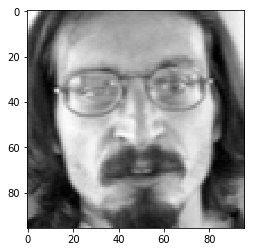

In [15]:
plt.imshow(X_train[100].reshape(96,96),cmap='gray')
plt.show()

Done!

Lets get the keypoints

In [16]:
training = train_data.drop('Image',axis = 1)

y_train = []
for i in range(0,7049):
    y = training.iloc[i,:]

    y_train.append(y)
y_train = np.array(y_train,dtype = 'float')

Lets do the same process for test data

In [18]:
Test_Dir = 'test.csv'
test_data = pd.read_csv(Test_Dir)
test_data.fillna(method = 'ffill',inplace = True)
#train_data.reset_index(drop = True,inplace = True

imag = []
for i in range(0,test_data.shape[0]):
    img = test_data['Image'][i].split(' ')
    img = np.array(['0' if x == '' else x for x in img])
    img = img.reshape(-1,96,96,1)
    imag.append(img)
    
X_test = np.array(imag)
print("before")
print(X_test.shape)

X_test = X_test.reshape(-1,96,96,1)
print("After")
print(X_test.shape)



before
(1783, 1, 96, 96, 1)
After
(1783, 96, 96, 1)


Lets save the images in to a pickle file

In [19]:
import pickle

In [20]:
pickle.dump(X_train,open("train_images.pkl","wb"))
pickle.dump(y_train,open("train_labels.pkl","wb"))
pickle.dump(X_test,open("test_images.pkl","wb"))

### Visualize Image

We have to visualize the image with the facial landmarks

In [21]:
X_train = pickle.load(open("train_images.pkl","rb"))
y_train = pickle.load(open("train_labels.pkl","rb"))

Lets take a sample image

In [22]:
image= X_train[1717]

label= y_train[1717]

label

array([63.69583007, 41.80198701, 32.86046701, 40.41980434, 58.26235236,
       42.3298851 , 69.9596772 , 42.43179593, 38.25399567, 40.92324383,
       26.98347338, 40.03458141, 56.14862342, 33.55158196, 77.60328461,
       33.42403661, 47.8555892 , 27.91678736, 19.25751152, 24.33053325,
       39.98793743, 59.92543854, 59.81812037, 79.77184453, 31.19594436,
       79.75499805, 44.58350812, 79.22635539, 44.33620174, 81.42279995])

A function to visualize the image with label

In [23]:
def visualize(image,label):
    x,y=[],[]
    for i in range(label.shape[0]):
        if (i+1)%2==1:
            x.append(label[i])
        else:
            y.append(label[i])


    plt.imshow(image.reshape(96,96),cmap="gray")
    plt.scatter(x,y,c="r")

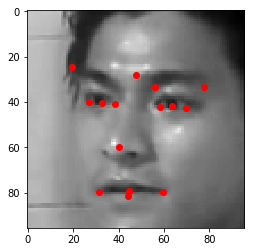

In [24]:
visualize(image,label)

## Awesome!! Let start Neural Network!!

## Training

Importing necessary packages

In [25]:
import torch
from torch.autograd import Variable
import torch.nn as nn
import torch.nn.functional as F

Fixing the random seed

In [26]:
SEED=1001

In [27]:
torch.manual_seed(SEED)
np.random.seed(SEED)

Some Hyperparameters

In [28]:
BATCH_SIZE=128

EPOCHS=100

Here , I defined a simple four layer Convolutional neural network. It is just for baseline model. My intention was to to make a full pipeline first and then increase the complexity if necessary . Also to visualize the layers if they really can extract the features.

### Model

The problem is a regression problem. It detects the x,y coordinates of 15 keypoints. Hence the output size is ```(30,)```.

In [29]:
class SezanNet(nn.Module):
    def __init__(self):
        super(SezanNet, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=32, kernel_size=(4, 4),stride=2) ## 32x47x47
        self.dropout=nn.Dropout()
        self.conv2 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=(4, 4),stride=2) # 64x22x22
        self.conv3 = nn.Conv2d(in_channels=64,out_channels=128,kernel_size=(3,3),stride=2) # 128x10x10
        self.conv4 = nn.Conv2d(in_channels=128,out_channels=256,kernel_size=(1,1),stride=2) # 256x5x5
        
        self.relu = nn.ReLU()
        self.fc1 = nn.Linear(in_features=256*5*5,out_features=30)
        
    def forward(self,x):
        x = self.dropout(self.relu(self.conv1(x)))
        x = self.dropout(self.relu(self.conv2(x)))
        x = self.dropout(self.relu(self.conv3(x)))
        x = self.dropout(self.relu(self.conv4(x)))
        x = x.view(x.size(0),-1)
        x = self.fc1(x)
        return x
        

In [30]:
net = SezanNet()

Importing Data

## But Hold on!

I got this idea ( actually i copied from Computer Vision Nanodegree) , of making a seperate script ```data_load.py``` only for data loading. I am not showing the full process . But it is sufficient to say that , the script has three classes

- ```Normalize``` it normalizes the image from 0.0 to 1.0 and keypoints from -1.0 to 1.0
- ```Totensor``` it converts images as well keypoints to pytorch tensor
- ``` FacialKeypointsDataset``` - it takes the images and labels pickle files and transforms them all according to transform classes. 

You can get some examples [here](https://pytorch.org/tutorials/beginner/data_loading_tutorial.html)

In [31]:
from data_load import *

In [32]:
train_data_transform = transforms.Compose([Normalize(), \
                                           ToTensor()])

In [33]:
dataset = FacialKeypointsDataset("train_images.pkl","train_labels.pkl",transform=train_data_transform)

Splitting to train and test result

In [34]:
from sklearn.model_selection import train_test_split

In [35]:
train_data,val_data=train_test_split(dataset,test_size=0.2)

Dataloader generator

In [36]:
from torch.utils.data import Dataset, DataLoader

In [37]:
train_loader=DataLoader(train_data,batch_size=BATCH_SIZE,shuffle=True)

In [38]:
validation_loader= DataLoader(val_data,batch_size=BATCH_SIZE,shuffle=True)

In [39]:
from torch.autograd import Variable

In [40]:
import torch.optim as optim

In [41]:
criterion = nn.MSELoss()

In [42]:
optimizer = optim.Adam(net.parameters(), lr=0.001)

Training 

In [43]:
losses=[]
validation_losses=[]
for epoch in range(EPOCHS):
    loss_sum=0
    val_loss_sum=0
    net.train()
    for iteration_train,batch_data in enumerate(train_loader):
        images=batch_data["image"]
        keypoints=batch_data["keypoints"]
        images= Variable(images)
        keypoints=Variable(keypoints)
        images=images.float()
        keypoints=keypoints.float()
        output_keypoints=net(images)
        loss = torch.sqrt(criterion(keypoints, output_keypoints))
        optimizer.zero_grad()
        loss_sum+=loss.data[0]
        loss.backward()
        optimizer.step()
    net.eval()
    for iteration_val,batch_data in enumerate(validation_loader):
        images=batch_data["image"]
        keypoints=batch_data["keypoints"]
        images= Variable(images)
        keypoints=Variable(keypoints)
        images=images.float()
        keypoints=keypoints.float()
        output_keypoints=net(images)
        loss = torch.sqrt(criterion(keypoints, output_keypoints))
        val_loss_sum+=loss.data[0]
        
    
    print("train loss {} , validation loss {}".format(loss_sum/(iteration_train+1),val_loss_sum/(iteration_val+1)))
    losses.append(loss_sum/(iteration_train+1))
    validation_losses.append(val_loss_sum/(iteration_val+1))

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:17: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number


train loss 5.425237655639648 , validation loss 3.8939077854156494
train loss 3.9826440811157227 , validation loss 3.7200019359588623
train loss 3.9659817218780518 , validation loss 3.7740650177001953
train loss 3.9442718029022217 , validation loss 3.808095932006836
train loss 3.922896385192871 , validation loss 3.700185775756836
train loss 3.8800809383392334 , validation loss 3.7662575244903564
train loss 3.8388638496398926 , validation loss 3.619922637939453
train loss 3.7563650608062744 , validation loss 3.506974935531616
train loss 3.6804325580596924 , validation loss 3.4494895935058594
train loss 3.622939348220825 , validation loss 3.35968279838562
train loss 3.537247657775879 , validation loss 3.3125455379486084
train loss 3.4457898139953613 , validation loss 3.2589786052703857
train loss 3.383971929550171 , validation loss 3.0803232192993164
train loss 3.3441357612609863 , validation loss 3.04178786277771
train loss 3.319330930709839 , validation loss 3.076205253601074
train loss

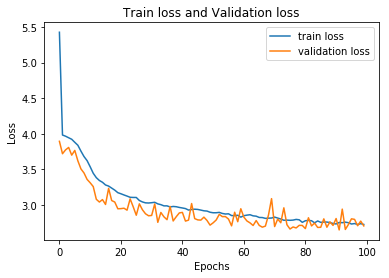

In [46]:
plt.plot(losses,label="train loss")
plt.plot(validation_losses,label="validation loss")
plt.title("Train loss and Validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

## Test a sample

In [47]:
sample=val_data[454]

In [48]:
image=sample["image"].data.numpy()
keypoints=sample["keypoints"].data.numpy()

In [49]:
keypoints = keypoints*48+48

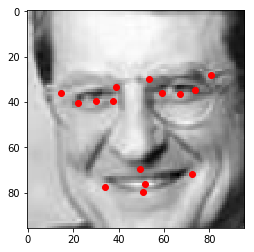

In [50]:
visualize(image,keypoints)

Prediction

In [51]:
image_tensor=torch.from_numpy(image.reshape(-1,1,96,96)).float()
net.eval()
predicted_keypoints=net(image_tensor)

predicted_keypoints=predicted_keypoints*48+48

predicted_keypoints=predicted_keypoints.data.numpy()

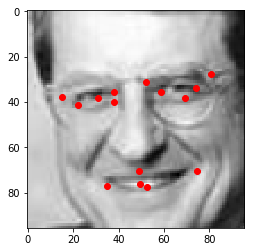

In [52]:
visualize(image,predicted_keypoints[0])

Lets make a function to visualize both prediction and actual keypoints 

In [55]:
def visualize(image,label,prediction):
    x,y,x_pred,y_pred=[],[],[],[]
    for i in range(label.shape[0]):
        if (i+1)%2==1:
            x.append(label[i])
        else:
            y.append(label[i])
    for i in range(prediction.shape[0]):
        if (i+1)%2==1:
            x_pred.append(prediction[i])
        else:
            y_pred.append(prediction[i])


    plt.imshow(image.reshape(96,96),cmap="gray")
    plt.scatter(x,y,c="r")
    plt.scatter(x_pred,y_pred,c="b")

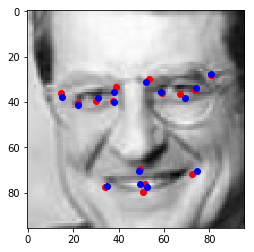

In [56]:
visualize(image,keypoints,predicted_keypoints[0])

### Saving the model 

In [57]:
torch.save(net.state_dict(),"network_state_dict.pkl")

## Visualize the feature!

Another thing, I learned from the nanodeegree project is the Feature visualization . i.e. to visualize the features captured by each layer. But I thought, what If I could do more! I thought about using [GradCAM](https://arxiv.org/abs/1610.02391) in keypoint detection!!!

### What is Grad-cam?

For people like me , In simple terms, Gradcam is some lines of codes to show which features or parts of the images **activates** to a particular layer when you feed into it. The most famouse example is this following image

![image](newgcam_heatmap_overlaid_283_cat_dog.png)

I used [this repository](https://github.com/jacobgil/pytorch-grad-cam) for my purpose!. But Obviously, I made some changes!

### Lets Go Grad-Cam!!

utility functions

In [75]:
import IPython

In [88]:
def imshow(img):
    _,ret = cv2.imencode('.jpg', img) 
    i = IPython.display.Image(data=ret)
    IPython.display.display(i)
    

In [170]:
def show_gradient(gradient):
    gradient = gradient.cpu().numpy().transpose(1, 2, 0)
    gradient -= gradient.min()
    gradient /= gradient.max()
    gradient *= 255.0
    plt.imshow(gradient.reshape(96,96),cmap="gray")


def show_gradcam(gcam, raw_image, paper_cmap=True):
    gcam = gcam.cpu().numpy()
    cmap = cm.jet_r(gcam)[..., :3] * 255.0
    raw_image=raw_image*255.0
    #cmap = cmap.reshape(96,96)
    raw_image=raw_image.reshape(96,96,1)
    if paper_cmap:
        alpha = gcam[..., None]
        gcam = alpha * cmap + (1 - alpha) * raw_image
    else:
        gcam = (cmap.astype(np.float) + raw_image.astype(np.float)) / 2
    plt.imshow(gcam)


In [58]:
class _BaseWrapper(object):
    def __init__(self, model):
        super(_BaseWrapper, self).__init__()
        self.device = next(model.parameters()).device
        self.model = model
        self.handlers = []  # a set of hook function handlers

    def _encode_one_hot(self, ids):
        one_hot = torch.zeros_like(self.logits).to(self.device)
        one_hot.scatter_(1, ids, 1.0)
        return one_hot

    def forward(self, image):
        self.image_shape = image.shape[2:]
        self.logits = self.model(image)
        
        return self.logits   # ordered results

    def backward(self, ids):
        """
        Class-specific backpropagation
        """
        
        self.model.zero_grad()
        self.logits.backward(gradient=ids, retain_graph=True)

    def generate(self):
        raise NotImplementedError

    def remove_hook(self):
        """
        Remove all the forward/backward hook functions
        """
        for handle in self.handlers:
            handle.remove()



This is the parent class of all GradCam classes. I changed the ```forward``` method such that , it will not output one hot encoded outputs! ***Why?*** . Because It is a regression problem , it doesnt need one hot encoded outputs!! So changed the ```line 17``` to  

#### Backpropagation Class

In [59]:
class BackPropagation(_BaseWrapper):
    def forward(self, image):
        self.image = image.requires_grad_()
        return super(BackPropagation, self).forward(self.image)

    def generate(self):
        gradient = self.image.grad.clone()
        self.image.grad.zero_()
        return gradient


In [64]:
bp = BackPropagation(model=net)
keypoints = bp.forward(image_tensor)  # sorted

In [70]:
bp.backward(ids=keypoints)
gradients = bp.generate()

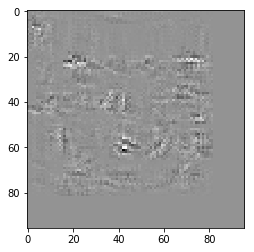

In [94]:
show_gradient(gradients[0])

I dont think we can get some intuition from this map! 

### Lets try GradCAM!

In [109]:
import matplotlib.cm as cm

In [95]:
class GradCAM(_BaseWrapper):
    """
    "Grad-CAM: Visual Explanations from Deep Networks via Gradient-based Localization"
    https://arxiv.org/pdf/1610.02391.pdf
    Look at Figure 2 on page 4
    """

    def __init__(self, model, candidate_layers=None):
        super(GradCAM, self).__init__(model)
        self.fmap_pool = {}
        self.grad_pool = {}
        self.candidate_layers = candidate_layers  # list

        def save_fmaps(key):
            def forward_hook(module, input, output):
                self.fmap_pool[key] = output.detach()

            return forward_hook

        def save_grads(key):
            def backward_hook(module, grad_in, grad_out):
                self.grad_pool[key] = grad_out[0].detach()

            return backward_hook

        # If any candidates are not specified, the hook is registered to all the layers.
        for name, module in self.model.named_modules():
            if self.candidate_layers is None or name in self.candidate_layers:
                self.handlers.append(module.register_forward_hook(save_fmaps(name)))
                self.handlers.append(module.register_backward_hook(save_grads(name)))

    def _find(self, pool, target_layer):
        if target_layer in pool.keys():
            return pool[target_layer]
        else:
            raise ValueError("Invalid layer name: {}".format(target_layer))

    def generate(self, target_layer):
        fmaps = self._find(self.fmap_pool, target_layer)
        grads = self._find(self.grad_pool, target_layer)
        weights = F.adaptive_avg_pool2d(grads, 1)

        gcam = torch.mul(fmaps, weights).sum(dim=1, keepdim=True)
        gcam = F.relu(gcam)
        gcam = F.interpolate(
            gcam, self.image_shape, mode="bilinear", align_corners=False
        )

        B, C, H, W = gcam.shape
        gcam = gcam.view(B, -1)
        gcam -= gcam.min(dim=1, keepdim=True)[0]
        gcam /= gcam.max(dim=1, keepdim=True)[0]
        gcam = gcam.view(B, C, H, W)

        return gcam


In [179]:
gcam = GradCAM(model=net)
_ = gcam.forward(image_tensor)
gcam.backward(keypoints)

for generate method we need a name for ```target layer```

In [180]:
for name,module in net.named_modules():
    print(name)


conv1
dropout
conv2
conv3
conv4
relu
fc1


let's check first layer ***conv1***

In [181]:
regions = gcam.generate(target_layer="conv1")

Lets plot the generated region

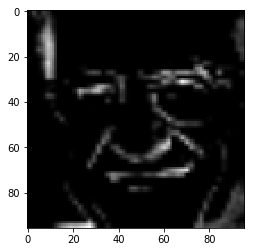

In [182]:
gcam=regions[0,0].cpu().numpy()

plt.imshow(gcam,cmap="gray")

Lets get the colormap

In [183]:
cmap = cm.jet_r(gcam)[..., :3] 

In [184]:
result=(cmap.astype(np.float) + image.reshape(96,96,1).astype(np.float)) /2

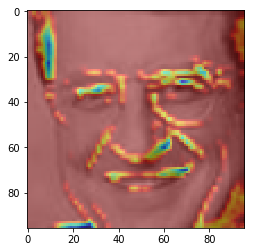

In [185]:
plt.imshow(result,cmap="gray")

We see the keypoint areas or the areas adjacent to landmarks are activated! But there are other areas as well! Why them ? Most likely, using more robust network, will not activate them! 